### House Rental Prediction
- Let's create a ML model to predict rent of house.
- Here is the data - Link : https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt
- Make sure you do data wrangling & get useful insights/visualizations
- Create models using Linear Regressions or variations of it
- Think harder about data preprocessing


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('house_rental_data.csv')
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
round(df.describe(),2)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.00,645.00,645.00,645.00,645.00,645.00,645.00
mean,1527.66,5.94,10.86,2.84,1.81,1.81,61986.82
std,767.39,3.88,5.00,1.01,0.46,0.68,35635.09
min,359.36,1.00,1.00,1.00,0.00,0.00,6100.00
25%,925.08,3.00,7.00,2.00,2.00,1.00,39000.00
50%,1423.20,5.00,12.00,3.00,2.00,2.00,50000.00
75%,1892.86,8.00,14.00,4.00,2.00,2.00,75000.00
max,5856.47,22.00,38.00,7.00,4.00,5.00,250000.00


/home/kranthi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


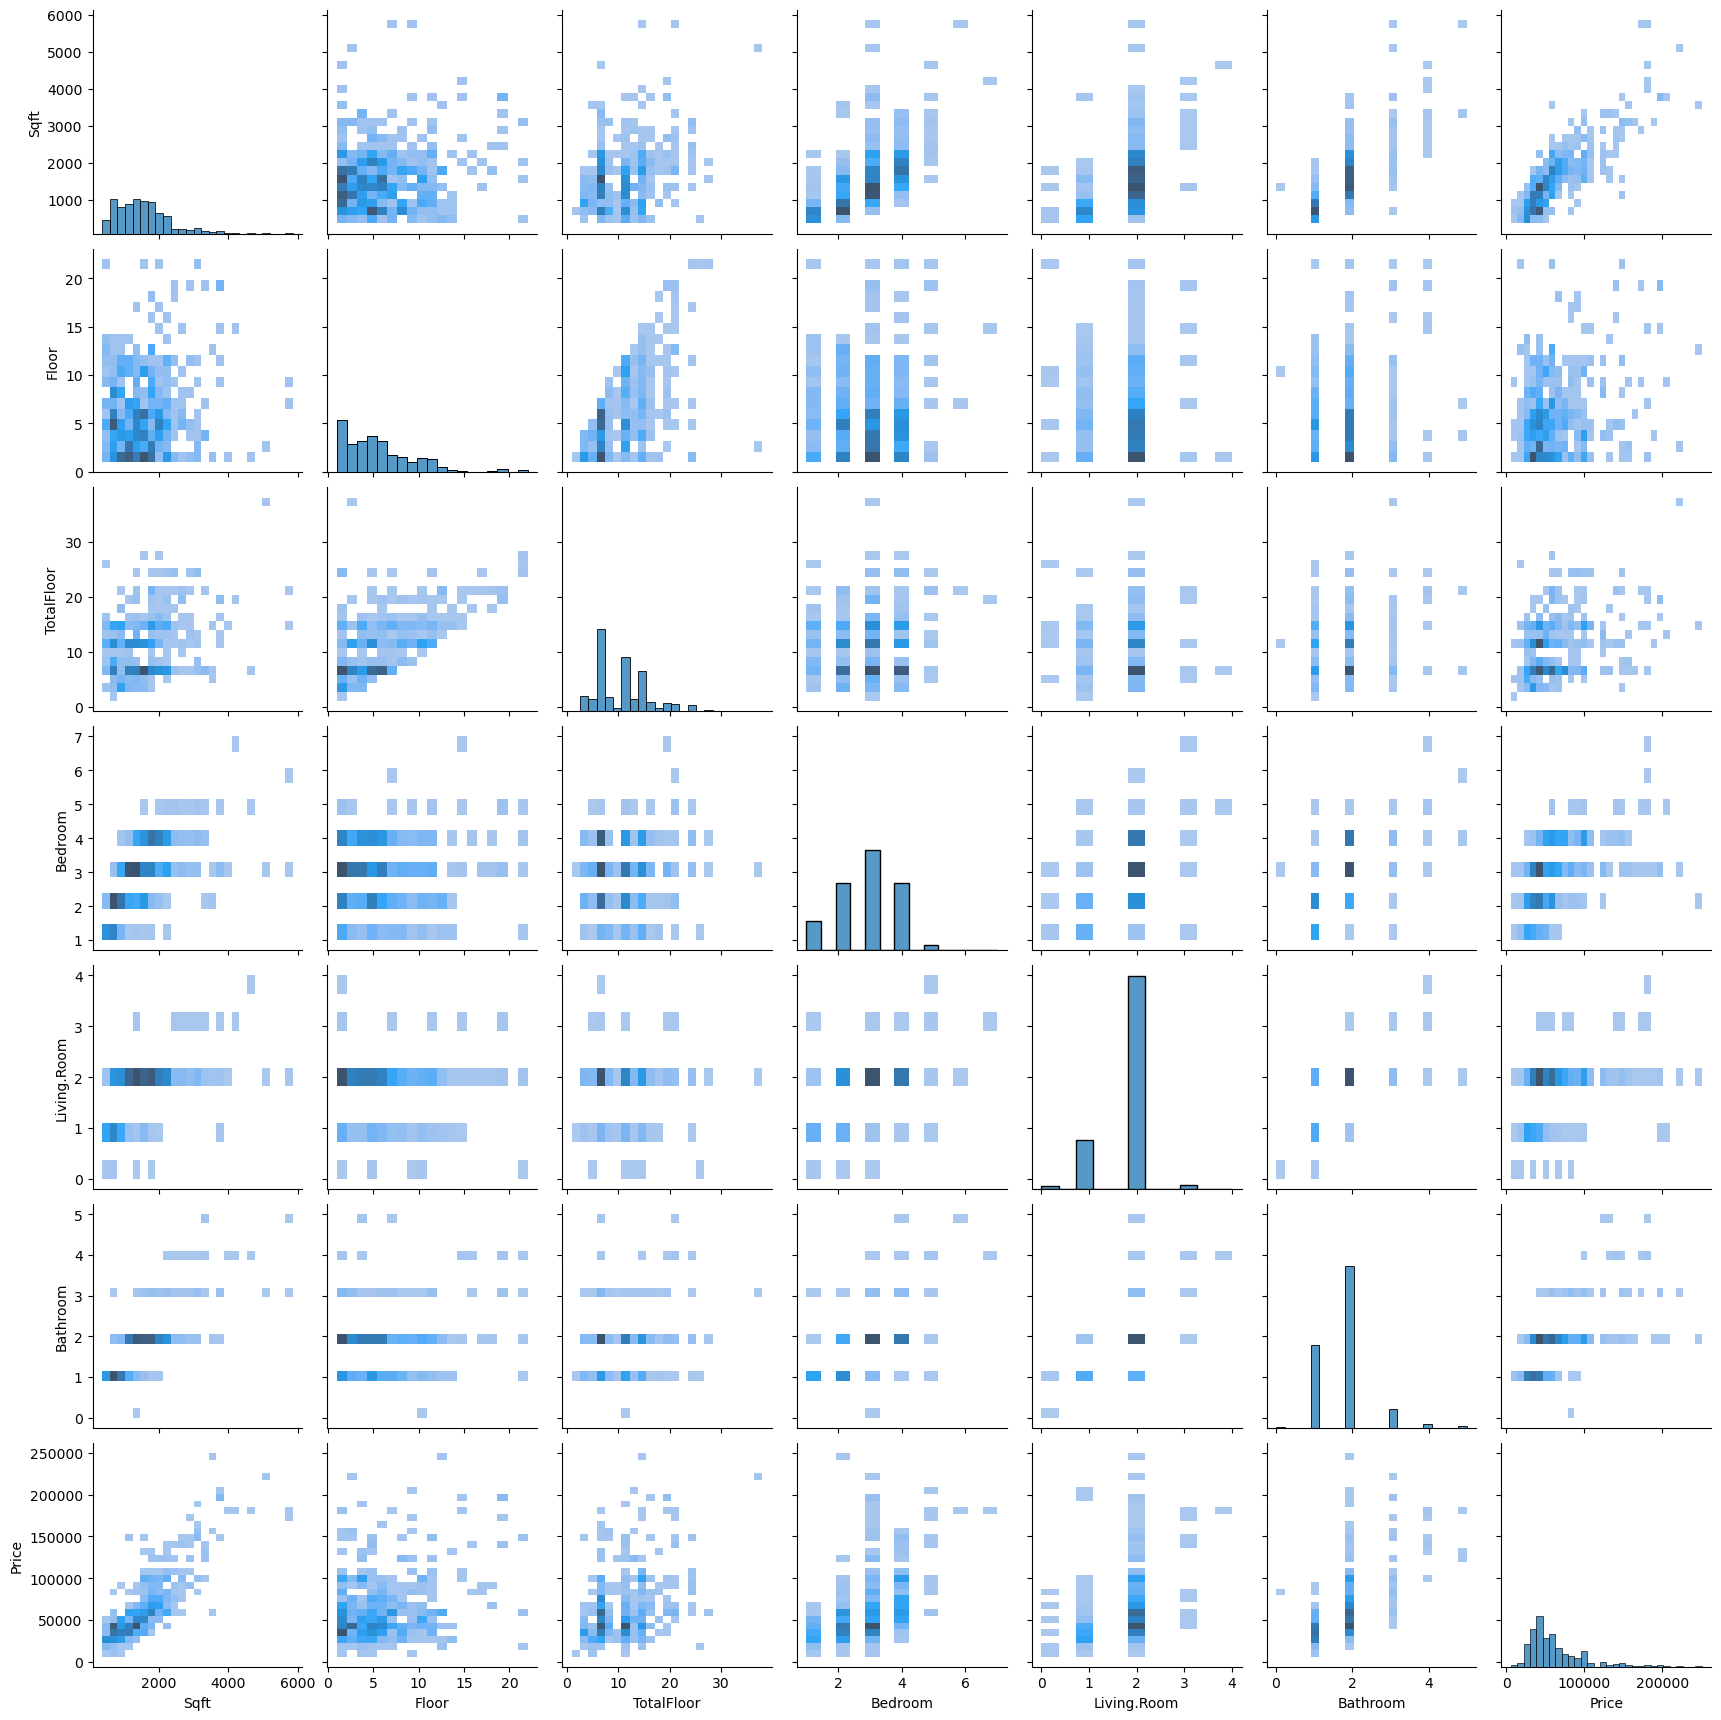

In [6]:
sns.pairplot(df,kind='hist')

In [15]:
for var in df.columns:
    print(f"{df[var].name} : {df[var].unique()}")

Sqft : [1177.698 2134.8   1138.56  1458.78   967.776 1127.886 1352.04   757.854
 1152.792 1423.2    668.904  711.6    818.34  2768.124  462.54  2739.66
 1174.14  2490.6    747.18  1668.702 3664.74  1779.    3059.88   533.7
  853.92  1732.746 1245.3   1206.162  861.036  434.076  768.528 3735.9
  889.5   3063.438  925.08  1771.884 1601.1   1487.244 2277.12  2241.54
 1494.36  4643.19  2191.728  640.44  1067.4   1362.714  604.86  1184.814
  391.38   426.96  1270.206 1284.438 1892.856  996.24  1754.094 2063.64
 1522.824 1540.614  914.406 1558.404  772.086 1227.51  1451.664 3255.57
 2312.7   1992.48  1529.94  2145.474 2170.38  1956.9   1743.42  1707.84
 2366.07  1814.58  2938.908 3173.736 2917.56  1786.116 3202.2    583.512
 2099.22   857.478 2227.308 2088.546 1569.078  960.66   878.826 1280.88
 2149.032 2543.97  2067.198  732.948 1572.636 2540.412 1135.002 1544.172
 1921.32  2558.202 1195.488 3323.172 1223.952 2028.06  4981.2    900.174
 1704.282 1565.52   572.838  683.136 4091.7   1124.328

<Axes: xlabel='TotalFloor', ylabel='Price'>

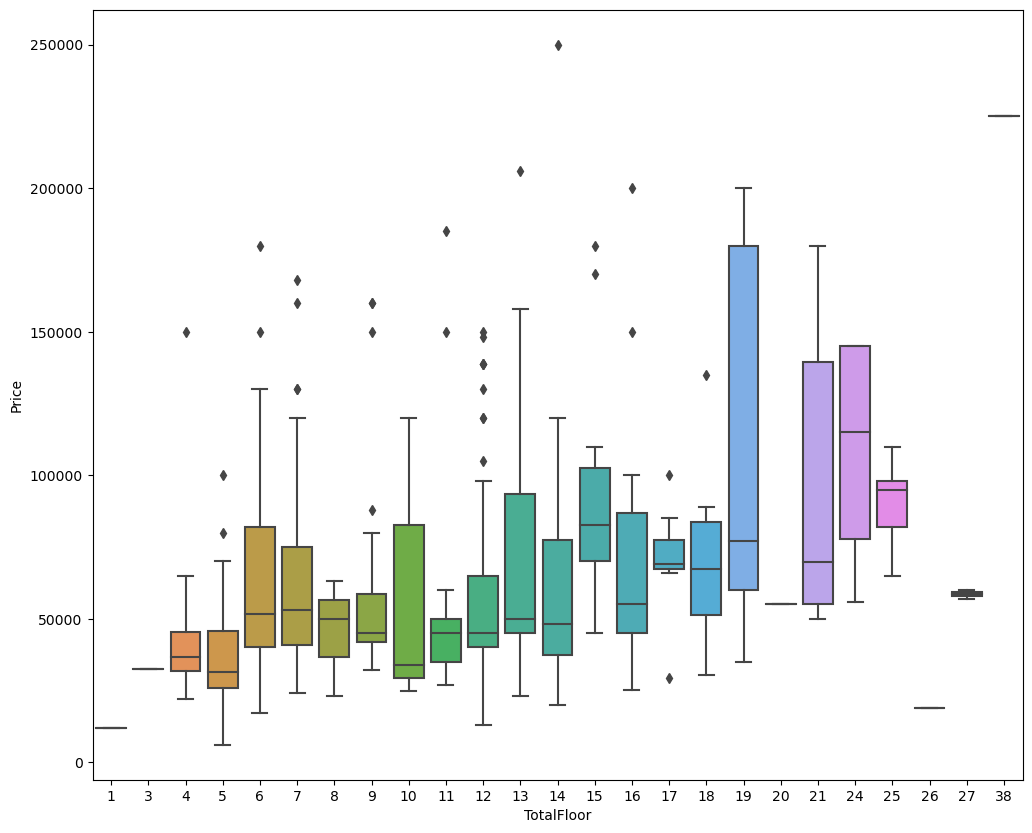

In [8]:
plt.figure(figsize=(12,10))
sns.boxplot(x=df['TotalFloor'],y=df['Price'])

<Axes: xlabel='Floor', ylabel='Price'>

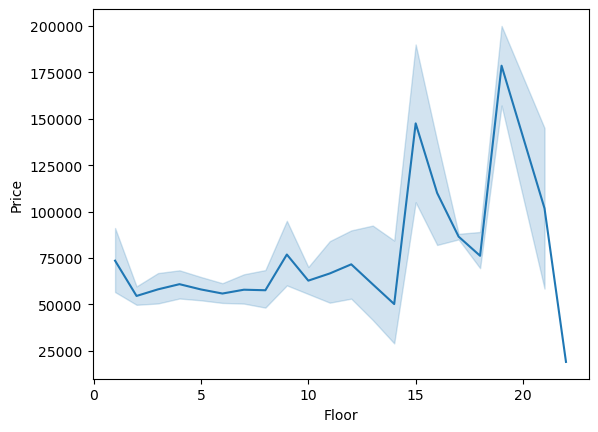

In [9]:
sns.lineplot(x=df['Floor'],y=df['Price'])

In [10]:
import plotly.express as px
px.scatter(x=df['Price'],y=df['Sqft'])


<Axes: >

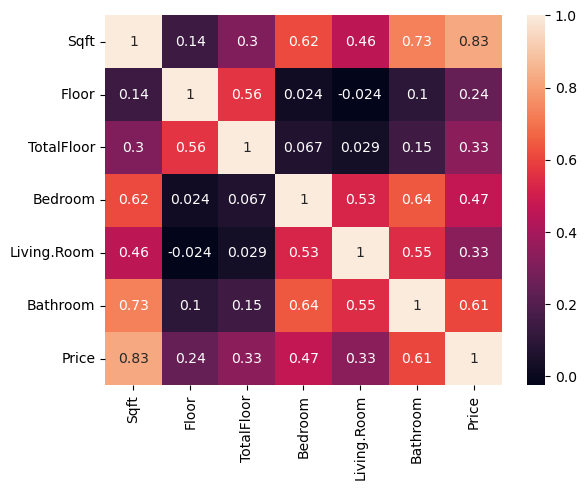

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
# Estimate the correlation between Price and other variables.
df.corr()['Price']

Sqft           0.825514
Floor          0.244553
TotalFloor     0.333631
Bedroom        0.467059
Living.Room    0.328788
Bathroom       0.605542
Price          1.000000
Name: Price, dtype: float64

In [13]:
# Check null values
for i in df.columns:
    print(f'{df[i].name} : {df[i].isnull().sum()}')
        

Sqft : 0
Floor : 0
TotalFloor : 0
Bedroom : 0
Living.Room : 0
Bathroom : 0
Price : 0


In [16]:
X = df.drop(['Price'],axis=1)
y = df['Price']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
X_train.shape, X_test.shape

((451, 6), (194, 6))

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
X_train

array([[0.12880259, 0.14285714, 0.11428571, 0.33333333, 0.66666667,
        0.25      ],
       [0.19352751, 0.57142857, 0.51428571, 0.16666667, 0.66666667,
        0.25      ],
       [0.19352751, 0.14285714, 0.05714286, 0.5       , 0.66666667,
        0.25      ],
       ...,
       [0.18317152, 0.14285714, 0.22857143, 0.5       , 0.66666667,
        0.25      ],
       [0.48220065, 0.14285714, 0.22857143, 0.33333333, 0.66666667,
        0.25      ],
       [0.46925566, 0.04761905, 0.62857143, 0.5       , 0.66666667,
        0.25      ]])

In [22]:
X_test

array([[0.13462783, 0.04761905, 0.11428571, 0.5       , 0.66666667,
        0.25      ],
       [0.13527508, 0.04761905, 0.02857143, 0.16666667, 0.66666667,
        0.25      ],
       [0.2       , 0.95238095, 0.68571429, 0.33333333, 0.66666667,
        0.25      ],
       ...,
       [0.25372168, 0.0952381 , 0.11428571, 0.33333333, 0.66666667,
        0.25      ],
       [0.28414239, 0.0952381 , 0.11428571, 0.5       , 0.66666667,
        0.25      ],
       [0.25436893, 0.14285714, 0.37142857, 0.5       , 0.66666667,
        0.25      ]])

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import math

Linear_reg = LinearRegression()
Ridge_reg = Ridge(alpha=1.0)
Lasso_reg = Lasso(alpha=1.0)

In [35]:
Linear_reg.fit(X_train, y_train)
Ridge_reg.fit(X_train, y_train)
Lasso_reg.fit(X_train, y_train)

Lasso()

In [36]:
linear_pred = Linear_reg.predict(X_test)
ridge_pred = Ridge_reg.predict(X_test)
lasso_pred = Lasso_reg.predict(X_test)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    print(f"Metrics for {model_name}:")
    print(f"  MAE: {mae:.2f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")

print("Evaluation Results:")
evaluate_model(y_test, linear_pred, "Linear Regression")
evaluate_model(y_test, ridge_pred, "Ridge Regression")
evaluate_model(y_test, lasso_pred, "Lasso Regression")

Evaluation Results:
Metrics for Linear Regression:
  MAE: 13912.65
  MSE: 380870511.08
  RMSE: 19515.90
Metrics for Ridge Regression:
  MAE: 14508.66
  MSE: 421271464.94
  RMSE: 20524.90
Metrics for Lasso Regression:
  MAE: 13915.49
  MSE: 380992339.98
  RMSE: 19519.03
